# Step 4: Neural Networks

In [31]:
## Imports
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.metrics import Recall, Precision
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')


### Read in data from step 1 & prep for modeling

In [2]:
# Import the data we're looking at from part 1
both_posts_imp = pd.read_csv('../data/both_posts_step1_xl.csv')
both_posts_imp.drop(columns="Unnamed: 0", inplace=True)
both_posts_imp.head()

,created_utc,selftext,subreddit,title,ds_ind
0,1638348806,Ideally would love a program that goes at my o...,datascience,Can a master's in DS from WGU or like universi...,1
1,1638348235,NaN,datascience,Data Scientists in Germany: What to expect as ...,1
2,1638344086,NaN,datascience,How's Pluralsight for Data Science?,1
3,1638341696,I am trying to implement this for car dashcam ...,datascience,vid2depth on custom video,1
4,1638333037,\n\nShould I buy this offer if I now the basi...,datascience,DataCamp CyberMonday Offer,1


### Create Stopwords Lists

In [3]:
stopwords_custom1 = nltk.corpus.stopwords.words('english')
stopwords_custom1.append("data science")
stopwords_custom1.append("analytics")
stopwords_custom1.append("science")
stopwords_custom1.append("scientists")
stopwords_custom1.append("data")

In [4]:
stopwords_custom2 = nltk.corpus.stopwords.words('english')
stopwords_custom2.append("data science")
stopwords_custom2.append("data")
stopwords_custom2.append("analytics")
stopwords_custom2.append("science")
stopwords_custom2.append("scientists")
stopwords_custom2.append("get")
stopwords_custom2.append("amp")
stopwords_custom2.append("would")
stopwords_custom2.append("using")
stopwords_custom2.append("use")

## Setup Target X and Y

In [5]:
tf.random.set_seed(42)

In [6]:
#create X based on title texts
XX=both_posts_imp['title']

In [7]:
#Create Count Vectorizer df
cv = CountVectorizer(min_df = 2, stop_words='english')
cv.fit(XX)
cv_text = cv.transform(XX)
# use .todense() to de-sparsify the cvec text
cv_text_df = pd.DataFrame(cv_text.todense(), columns = cv.get_feature_names())
cv_text_df.head()

,00,000,01,02,03,04,05,06,065,07,...,zuora,массивами,нуля,оf,операции,основы,раssed,إلى,𝐃𝐚𝐭𝐚,𝐒𝐜𝐢𝐞𝐧𝐜𝐞
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#train test split 
X=cv_text_df
y=both_posts_imp['ds_ind']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

sc=StandardScaler()
X_train_sc= sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [10]:
n_input = X_train_sc.shape[1]
n_input

6088

In [11]:
#use number in power of 2 that is > n_input above
2**13

8192

## Model Passes

In [12]:
# 1st Pass with Simple Structure 


# Instantiate our Network
model = Sequential()

# First layer - input AND 1st hidden layer
model.add(Dense(units=8192, # number of neuros in the 1st hidden layer (number in the power of 2 that is larger than than the number of features)
                activation='relu', # Relu activation function
                input_shape=(6088,) # Shape of the input layer/number of features/numnber of neurons in the input layer
                ))
# Add a second hidden layer
model.add(Dense(units=8192, activation='relu')) # NO need to specificy the input_shape because it knows from the previous layer

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='bce', optimizer='adam', metrics=['acc'])

results = model.fit(X_train_sc, y_train, #training data
                    epochs=10, # Number of passes
                    batch_size=256, #Maximum of 256 rows of data in every mini batch
                    validation_data=(X_test_sc, y_test) # Validation data/Unseen Data
                    )

Epoch 1/10
59/59 [==============================] - 53s 891ms/step - loss: 2.1798 - acc: 0.6030 - val_loss: 0.6145 - val_acc: 0.7183
Epoch 2/10
59/59 [==============================] - 67s 1s/step - loss: 0.4040 - acc: 0.8252 - val_loss: 0.5981 - val_acc: 0.7371
Epoch 3/10
59/59 [==============================] - 73s 1s/step - loss: 0.2145 - acc: 0.9088 - val_loss: 0.8911 - val_acc: 0.7367
Epoch 4/10
59/59 [==============================] - 74s 1s/step - loss: 0.1433 - acc: 0.9397 - val_loss: 1.2014 - val_acc: 0.7355
Epoch 5/10
59/59 [==============================] - 73s 1s/step - loss: 0.1192 - acc: 0.9533 - val_loss: 1.1981 - val_acc: 0.7347
Epoch 6/10
59/59 [==============================] - 74s 1s/step - loss: 0.0905 - acc: 0.9627 - val_loss: 1.5927 - val_acc: 0.7311
Epoch 7/10
59/59 [==============================] - 73s 1s/step - loss: 0.0825 - acc: 0.9655 - val_loss: 1.7238 - val_acc: 0.7385
Epoch 8/10
59/59 [==============================] - 74s 1s/step - loss: 0.0764 - acc: 0

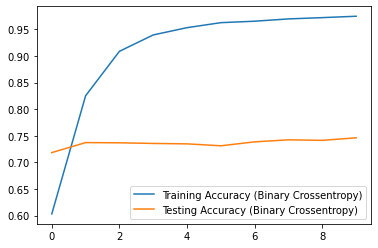

In [13]:
plt.plot(results.history['acc'], label='Training Accuracy (Binary Crossentropy)')
plt.plot(results.history['val_acc'], label='Testing Accuracy (Binary Crossentropy)')
plt.legend();

In [32]:
# 2nd Pass with Dropout Layers

# Instantiate our Network
model2 = Sequential()

# First layer - input AND 1st hidden layer
model2.add(Dense(units=8192, # number of neuros in the 1st hidden layer (number in the power of 2 that is larger than than the number of features)
                activation='relu', # Relu activation function
                input_shape=(6088,) # Shape of the input layer/number of features/numnber of neurons in the input layer
                ))

# Output Layer
model2.add(Dense(units=3000, activation='sigmoid'))
model2.add(Dropout(0.2)) # Refers to nodes in the first hidden layer
model2.add(Dense(100, activation = 'relu'))
model2.add(Dropout(0.2))


model2.add(Dense(1, activation = 'sigmoid'))


model2.compile(loss='bce', optimizer='adam', metrics=['acc'])

results2 = model2.fit(X_train_sc, y_train, #training data
                    epochs=10, # Number of passes
                    batch_size=256, #Maximum of 256 rows of data in every mini batch
                    validation_data=(X_test_sc, y_test) # Validation data/Unseen Data
                    )

Epoch 1/10
59/59 [==============================] - 25s 414ms/step - loss: 0.7827 - acc: 0.5879 - val_loss: 0.5599 - val_acc: 0.7333
Epoch 2/10
59/59 [==============================] - 29s 489ms/step - loss: 0.4436 - acc: 0.7639 - val_loss: 0.5106 - val_acc: 0.7489
Epoch 3/10
59/59 [==============================] - 29s 487ms/step - loss: 0.3163 - acc: 0.8768 - val_loss: 0.5679 - val_acc: 0.7477
Epoch 4/10
59/59 [==============================] - 31s 524ms/step - loss: 0.2418 - acc: 0.9103 - val_loss: 0.7048 - val_acc: 0.7463
Epoch 5/10
59/59 [==============================] - 33s 560ms/step - loss: 0.1933 - acc: 0.9287 - val_loss: 0.7910 - val_acc: 0.7429
Epoch 6/10
59/59 [==============================] - 38s 649ms/step - loss: 0.1699 - acc: 0.9378 - val_loss: 0.8222 - val_acc: 0.7530
Epoch 7/10
59/59 [==============================] - 43s 736ms/step - loss: 0.1443 - acc: 0.9491 - val_loss: 0.9949 - val_acc: 0.7433
Epoch 8/10
59/59 [==============================] - 44s 741ms/step - 

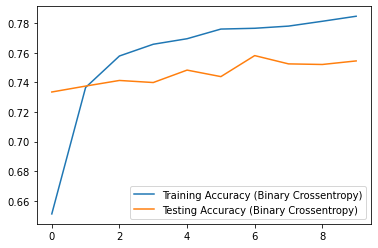

In [15]:
plt.plot(results2.history['acc'], label='Training Accuracy (Binary Crossentropy)')
plt.plot(results2.history['val_acc'], label='Testing Accuracy (Binary Crossentropy)')
plt.legend();

In [16]:
# 3rd Pass with Early Stopping (first iteration)

model3 = Sequential()

# First layer is the input layer AND the hidden layer
model3.add(Dense(units=8192, # number of neuros in the 1st hidden layer (number in the power of 2 that is larger than than the number of features)
                activation='relu', # Relu activation function
                input_shape=(6088,) # Shape of the input layer/number of features/numnber of neurons in the input layer
                ))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(16, activation='relu'))

model3.add(Dense(units=1, activation='sigmoid'))
model3.compile(loss='bce', optimizer='adam', metrics=['acc'])

early_stop = EarlyStopping(monitor = 'val_loss', min_delta=0, patience = 5, verbose = 1, mode = 'auto')

results3 = model3.fit(X_train_sc, y_train,
                    batch_size=256,
                    epochs=10,
                    validation_data=(X_test_sc, y_test),
                    callbacks = [early_stop]
                    
                    )

Epoch 1/10
59/59 [==============================] - 24s 408ms/step - loss: 0.6030 - acc: 0.6749 - val_loss: 0.5140 - val_acc: 0.7469
Epoch 2/10
59/59 [==============================] - 24s 405ms/step - loss: 0.3039 - acc: 0.8628 - val_loss: 0.6449 - val_acc: 0.7461
Epoch 3/10
59/59 [==============================] - 24s 401ms/step - loss: 0.1980 - acc: 0.9112 - val_loss: 0.8009 - val_acc: 0.7493
Epoch 4/10
59/59 [==============================] - 24s 410ms/step - loss: 0.1495 - acc: 0.9355 - val_loss: 0.9044 - val_acc: 0.7536
Epoch 5/10
59/59 [==============================] - 24s 401ms/step - loss: 0.1180 - acc: 0.9458 - val_loss: 1.2548 - val_acc: 0.7544
Epoch 6/10
59/59 [==============================] - 24s 401ms/step - loss: 0.0960 - acc: 0.9541 - val_loss: 1.4311 - val_acc: 0.7522
Epoch 00006: early stopping


In [17]:
# 4th Pass with more dropout layers


model4 = Sequential()

model4.add(Dense(units=8192, # number of neuros in the 1st hidden layer (number in the power of 2 that is larger than than the number of features)
                activation='relu', # Relu activation function
                input_shape=(6088,) # Shape of the input layer/number of features/numnber of neurons in the input layer
                ))

model4.add(Dense(10, activation = 'relu'))
model4.add(Dropout(0.2)) # Refers to nodes in the first hidden layer
model4.add(Dense(10, activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation = 'relu'))

model4.add(Dense(1, activation = 'sigmoid'))

model4.compile(
    loss = 'bce',
    optimizer = 'adam',
    metrics = ['acc']
)

results4 = model4.fit(X_train_sc, y_train, #training data
                    epochs=10, # Number of passes
                    batch_size=256, #Maximum of 256 rows of data in every mini batch
                    validation_data=(X_test_sc, y_test) # Validation data/Unseen Data
                    )

Epoch 1/10
59/59 [==============================] - 24s 396ms/step - loss: 0.6557 - acc: 0.6147 - val_loss: 0.5604 - val_acc: 0.7291
Epoch 2/10
59/59 [==============================] - 23s 398ms/step - loss: 0.5398 - acc: 0.7304 - val_loss: 0.5144 - val_acc: 0.7431
Epoch 3/10
59/59 [==============================] - 23s 397ms/step - loss: 0.4296 - acc: 0.8014 - val_loss: 0.5288 - val_acc: 0.7439
Epoch 4/10
59/59 [==============================] - 23s 392ms/step - loss: 0.3524 - acc: 0.8435 - val_loss: 0.5374 - val_acc: 0.7606
Epoch 5/10
59/59 [==============================] - 23s 389ms/step - loss: 0.2990 - acc: 0.8633 - val_loss: 0.6312 - val_acc: 0.7528
Epoch 6/10
59/59 [==============================] - 23s 388ms/step - loss: 0.2682 - acc: 0.8827 - val_loss: 0.6905 - val_acc: 0.7528
Epoch 7/10
59/59 [==============================] - 24s 402ms/step - loss: 0.2480 - acc: 0.8898 - val_loss: 0.6770 - val_acc: 0.7457
Epoch 8/10
59/59 [==============================] - 24s 406ms/step - 

In [28]:
# 5th Pass with more neurons and early stopping 


model5 = Sequential()

# First layer is the input layer AND the hidden layer
model5.add(Dense(units=8192, # number of neuros in the 1st hidden layer (number in the power of 2 that is larger than than the number of features)
                activation='relu', # Relu activation function
                input_shape=(6088,) # Shape of the input layer/number of features/numnber of neurons in the input layer
                ))
model5.add(Dense(300, activation='relu'))
model5.add(Dense(200, activation='relu'))
model5.add(Dense(300, activation='relu'))
model5.add(Dense(200, activation='relu'))
model5.add(Dense(100, activation='relu'))


model5.add(Dense(units=1, activation='sigmoid'))
model5.compile(loss='bce', optimizer='adam', metrics=['acc'])

early_stop = EarlyStopping(monitor = 'val_loss', min_delta=0, patience = 5, verbose = 1, mode = 'auto')

results5 = model5.fit(X_train_sc, y_train,
                    batch_size=256,
                    epochs=10,
                    validation_data=(X_test_sc, y_test),
                    callbacks = [early_stop]
                    
                    )

Epoch 1/10
59/59 [==============================] - 16s 260ms/step - loss: 0.5723 - acc: 0.6951 - val_loss: 0.5134 - val_acc: 0.7485
Epoch 2/10
59/59 [==============================] - 17s 281ms/step - loss: 0.2687 - acc: 0.8808 - val_loss: 0.6454 - val_acc: 0.7530
Epoch 3/10
59/59 [==============================] - 18s 304ms/step - loss: 0.1707 - acc: 0.9223 - val_loss: 0.9387 - val_acc: 0.7504
Epoch 4/10
59/59 [==============================] - 18s 306ms/step - loss: 0.1313 - acc: 0.9393 - val_loss: 1.0829 - val_acc: 0.7576
Epoch 5/10
59/59 [==============================] - 18s 301ms/step - loss: 0.1030 - acc: 0.9517 - val_loss: 1.0950 - val_acc: 0.7467
Epoch 6/10
59/59 [==============================] - 19s 319ms/step - loss: 0.0836 - acc: 0.9603 - val_loss: 1.5978 - val_acc: 0.7497
Epoch 00006: early stopping


## Compare Results & Evaluate

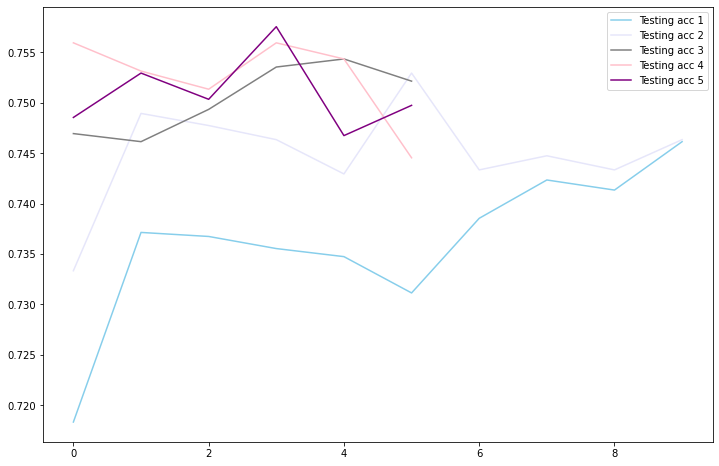

In [33]:
# Visualize testing accuracy


train_acc = results.history['acc']
test_acc = results.history['val_acc']

train_acc2 = results2.history['acc']
test_acc2 = results2.history['val_acc']

train_acc3 = results3.history['acc']
test_acc3 = results3.history['val_acc']

train_acc4 = results4.history['acc']
test_acc4 = results4.history['val_acc']

train_acc5 = results5.history['acc']
test_acc5 = results5.history['val_acc']




plt.figure(figsize=(12, 8))
#plt.plot(train_acc, label='Training acc 1', color='navy')
plt.plot(test_acc, label='Testing acc 1', color='skyblue')

#plt.plot(train_acc2, label='Training acc 2', color='violet')
plt.plot(test_acc2, label='Testing acc 2', color='lavender')

#plt.plot(train_acc3, label='Training acc 3', color='black')
plt.plot(test_acc3, label='Testing acc 3', color='grey')

#plt.plot(train_acc4, label='Training acc 4', color='orange')
plt.plot(test_acc4, label='Testing acc 4', color='pink')

#plt.plot(train_acc4, label='Training acc 4', color='orange')
plt.plot(test_acc5, label='Testing acc 5', color='purple')
plt.legend();

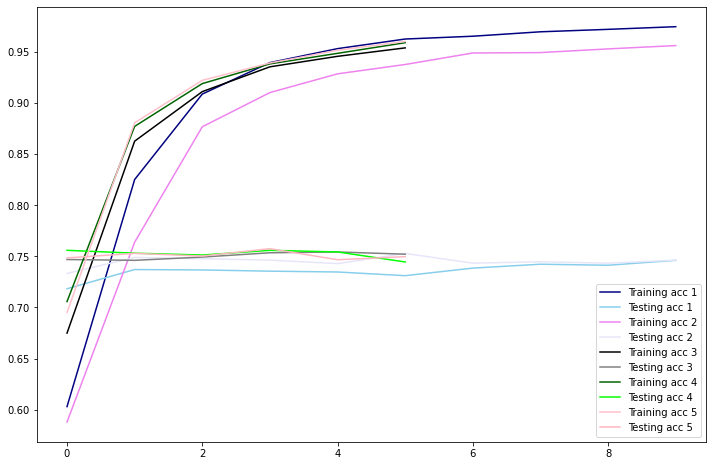

In [35]:
# Visualize all accuracy


train_acc = results.history['acc']
test_acc = results.history['val_acc']

train_acc2 = results2.history['acc']
test_acc2 = results2.history['val_acc']

train_acc3 = results3.history['acc']
test_acc3 = results3.history['val_acc']

train_acc4 = results4.history['acc']
test_acc4 = results4.history['val_acc']

train_acc5 = results5.history['acc']
test_acc5 = results5.history['val_acc']

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training acc 1', color='navy')
plt.plot(test_acc, label='Testing acc 1', color='skyblue')

plt.plot(train_acc2, label='Training acc 2', color='violet')
plt.plot(test_acc2, label='Testing acc 2', color='lavender')

plt.plot(train_acc3, label='Training acc 3', color='black')
plt.plot(test_acc3, label='Testing acc 3', color='grey')

plt.plot(train_acc4, label='Training acc 4', color='darkgreen')
plt.plot(test_acc4, label='Testing acc 4', color='lime')

plt.plot(train_acc5, label='Training acc 5', color='pink')
plt.plot(test_acc5, label='Testing acc 5', color='lightpink')
plt.legend();

In [36]:
results.history['acc'][-1], results.history['val_acc'][-1]

(0.9747949838638306, 0.7461492419242859)

In [37]:
results2.history['acc'][-1], results2.history['val_acc'][-1]

(0.956324577331543, 0.7463492751121521)

In [38]:
results3.history['acc'][-1], results3.history['val_acc'][-1]

(0.9540574550628662, 0.7521504163742065)

In [39]:
results4.history['acc'][-1], results4.history['val_acc'][-1]

(0.9591251611709595, 0.7445489168167114)

In [40]:
results5.history['acc'][-1], results5.history['val_acc'][-1]

(0.9603254199028015, 0.7497499585151672)

## Findings
* Model 3 seems to perform the best, although we are still not seeing accuracies that are competitive with our classification models (logistic regression tested 80.7%).
* This may be due to the limited size of our data- where we have less than 20k records.
* If I were to revisit this analysis, it would be interesting to see if more data yielded better results for neural networks
